In [85]:
!git push

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.10 MiB | 752.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/shashankkapoor/Digital_Image_Processing_EE608.git
   c8d9592..4e3851a  master -> master


# Assignment 3 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [46]:
''' change the path here to run the below code
'''
contrast_Stretch_path="/content/drive/MyDrive/Images_HWS/c1.jpg"
histogram_image_path="/content/drive/MyDrive/Images_HWS/DIP_gray_scales/Fingerprint - Copy.tif"
histogram_matching_Input_image="/content/drive/MyDrive/Images_HWS/eye.png"
histogram_matching_RInput_image="/content/drive/MyDrive/Images_HWS/eyeref.png"
awgn_image="/content/drive/MyDrive/Images_HWS/part2.png"
Edge_detection_image="/content/drive/MyDrive/Images_HWS/cameraman.png"
dft_image_1="/content/drive/MyDrive/Images_HWS/DIP_gray_scales/Coins - Copy.tif"
#dft_image_2="/content/drive/MyDrive/92049-captain-america-pixel-art-artist-artwork-hd-4k-digital-art-superheroes-behance.jpg"
#dft_image_3="/content/drive/MyDrive/92133-thor-pixel-art-artwork-artist-hd-4k-digital-art-superheroes-behance.jpg"
log_image="/content/drive/MyDrive/Images_HWS/DIP_gray_scales/lighthouse.png"

# Problem 1: Point Operations

#### 1. Write a program/function to do the ”Full scale contrast stretch (FSCS)”. Verify your result by printing the min and max pixel values before and after applying FSCS. Also, plot the histogram of the image before and after applying FSCS.

In [69]:
def Full_scale_contrast_stretch(image):
    image_array = np.array(image)
    print(image_array.shape)
    min_intensity = np.min(image_array)
    max_intensity = np.max(image_array)
    print("Minimum intensity value before Contrast Stretching "+ str(min_intensity))
    print("Maximum intensity value before Contrast Stretching "+ str(max_intensity))
    plot_histogram(image_array)
    scaled_array = (image_array - min_intensity) * (255 / (max_intensity - min_intensity))
    print("Minimum intensity value after Contrast Stretching "+ str(np.min(scaled_array)))
    print("Maximum intensity value after Contrast Stretching "+ str(np.max(scaled_array)))
    plt.imshow(scaled_array.astype(np.uint8), cmap='gray')
    plot_histogram(scaled_array)



In [70]:
def plot_histogram(image_array):
    histogram, bins = np.histogram(image_array.flatten(), bins=256, range=(0, 255))
    fig, ax = plt.subplots(figsize=(15,4))
    ax.hist(image_array.flatten(), bins=256, range=(0, 255))
    ax.set_title('Image Histogram')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Pixel Count')
    plt.show()

(500, 500)
Minimum intensity value before Contrast Stretching 90
Maximum intensity value before Contrast Stretching 138


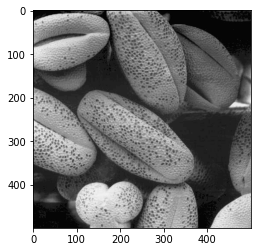

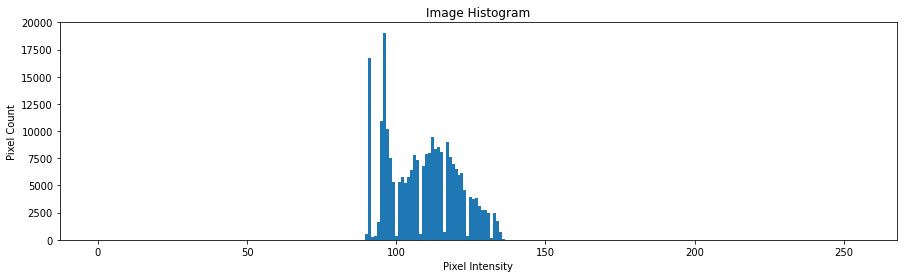

Minimum intensity value after Contrast Stretching 0.0
Maximum intensity value after Contrast Stretching 255.0


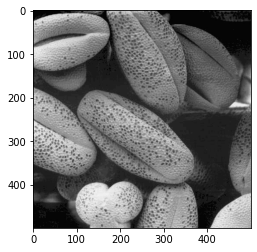

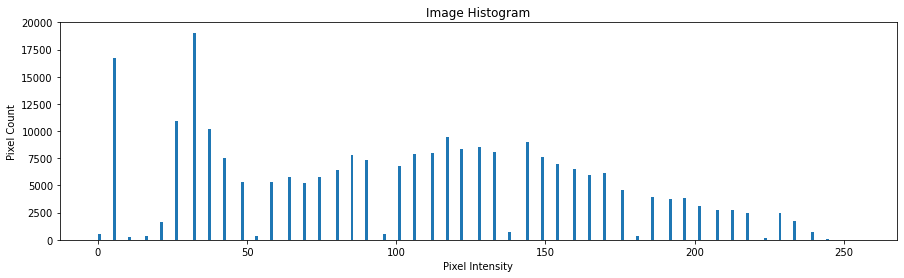

In [71]:
input_image = Image.open(contrast_Stretch_path)
plt.imshow(input_image,cmap='gray')
Full_scale_contrast_stretch(input_image)


#### 2. Imagine you have an image taken in low light levels and which, as a result, has low contrast. What are the advantages of using contrast stretching to improve the contrast, rather than simply scaling the image by a factor of, say, three? (Theory - write down your explanation)

In [13]:
'''
Ans.Contrast stretching is a non-linear transformation that enhances the contrast of an image by mapping its pixel values to a new range that 
spans the full dynamic range of the image. Scaling the image by a factor of three, on the other hand, is a linear transformation that 
multiplies all pixel values by a constant factor, effectively expanding the dynamic range of the image.

There are several advantages of using contrast stretching to improve the contrast of an image over simply scaling the image by a factor of 
three:
Preserving the relative differences: Contrast stretching preserves the relative differences between pixel values in the image. This means 
that the relationship between different parts of the image remains intact, and the image retains its overall structure and composition.
Better contrast control: Contrast stretching allows for more fine-grained control over the contrast enhancement process. It is possible
to adjust the amount of contrast enhancement by varying the parameters of the transformation function, which is not possible when simply
scaling the image.
Avoiding saturation and clipping: Scaling an image by a large factor can lead to pixel values being pushed beyond the maximum or minimum 
value that can be represented by the image's data type. This can result in saturation or clipping, where the image loses detail in areas 
where pixel values exceed the maximum or minimum value. Contrast stretching, on the other hand, avoids this problem by compressing the 
dynamic range of the image to fit within the available pixel value range.
Better preservation of image information: Contrast stretching enhances the contrast of an image while preserving its overall tonality and 
detail. Scaling the image by a factor of three can lead to loss of detail in shadow and highlight areas, as these areas become over- or 
under-exposed.

Overall, contrast stretching is a more powerful and flexible technique for enhancing the contrast of an image than simply scaling the image
by a factor of three. It allows for more precise control over the enhancement process, avoids saturation and clipping, and preserves the 
tonality and detail of the image.

'''

"\nAns.Contrast stretching is a non-linear transformation that enhances the contrast of an image by mapping its pixel values to a new range that \nspans the full dynamic range of the image. Scaling the image by a factor of three, on the other hand, is a linear transformation that \nmultiplies all pixel values by a constant factor, effectively expanding the dynamic range of the image.\n\nThere are several advantages of using contrast stretching to improve the contrast of an image over simply scaling the image by a factor of \nthree:\nPreserving the relative differences: Contrast stretching preserves the relative differences between pixel values in the image. This means \nthat the relationship between different parts of the image remains intact, and the image retains its overall structure and composition.\nBetter contrast control: Contrast stretching allows for more fine-grained control over the contrast enhancement process. It is possible\nto adjust the amount of contrast enhancement by

#### 3. Write a program to perform histogram equalization. Plot the histogram of the image before and after applying histogram equalization.

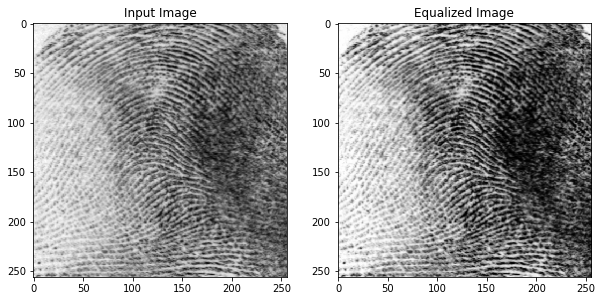

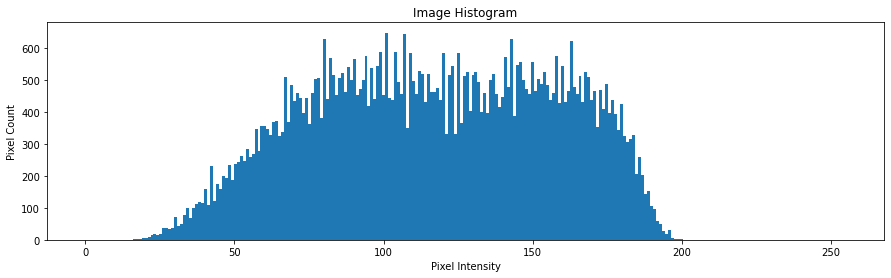

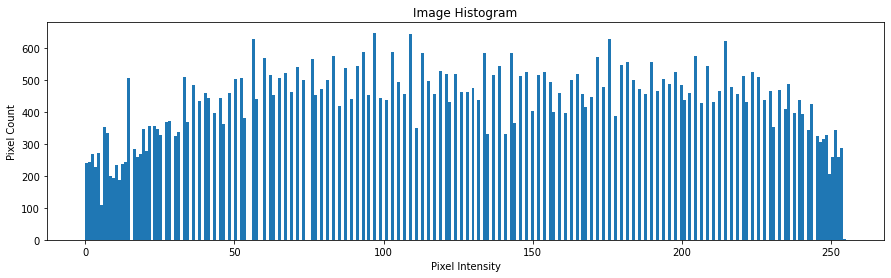

In [79]:
def histogram_equalization(image):
    image_array = np.array(image)
    hist, bins = np.histogram(image_array.flatten(), 256, [0,256])
    cdf = np.cumsum(hist) / float(image_array.size)
    mapping = np.uint8(255 * cdf)
    equalized_array = mapping[image_array]
    equalized_image = Image.fromarray(equalized_array)

    return equalized_image

input_image = Image.open(histogram_image_path)

equalized_image = histogram_equalization(input_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(input_image,cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(equalized_image,cmap='gray')
ax2.set_title('Equalized Image')
plt.show()

plot_histogram(np.array(input_image))
plot_histogram(np.array(equalized_image))

#### 4. Write a function, which takes an input image and a reference image and applies histogram Matching on the input image by matching the histogram with that of the reference image. Use eye.png and eyeref.png (converted to grayscale) as the input and reference images respectively.

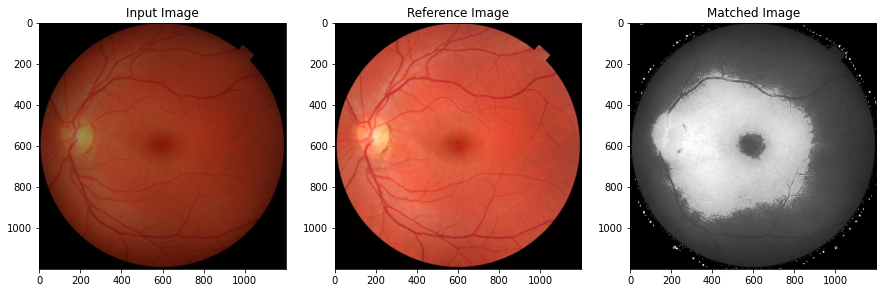

In [15]:
def histogram_matching(input_image, reference_image):

    input_array = np.array(input_image)
    input_array=input_array[:,:,0]
    reference_array = np.array(reference_image)
    refernce_array=reference_array[:,:,0]

    input_hist, bins = np.histogram(input_array.flatten(), 256, [0,256])
    reference_hist, bins = np.histogram(reference_array.flatten(), 256, [0,256])
    input_cdf = np.cumsum(input_hist) / float(np.sum(input_hist))
    reference_cdf = np.cumsum(reference_hist) / float(np.sum(reference_hist))
    mapping = np.zeros(256)
    for i in range(256):
        j = 255
        while reference_cdf[j] > input_cdf[i] and j >= 0:
            j -= 1
        mapping[i] = j
    matched_array = np.zeros_like(input_array)
    for i in range(input_array.shape[0]):
        for j in range(input_array.shape[1]):
            matched_array[i,j] = mapping[input_array[i,j]]

    matched_image = Image.fromarray(matched_array)

    return matched_image

input_image = Image.open(histogram_matching_Input_image)
reference_image = Image.open(histogram_matching_RInput_image)

matched_image = histogram_matching(input_image, reference_image)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(input_image)
ax1.set_title('Input Image')
ax2.imshow(reference_image)
ax2.set_title('Reference Image')
ax3.imshow(matched_image,cmap='gray')
ax3.set_title('Matched Image')
plt.show()


# Problem 2: Spatial Filtering

#### Image Filtering In this problem, you will denoise images using the linear filtering techniques discussed in class. Use additive white Gaussian noise (AWGN) with zero mean and variance σ2 = 25. Write a program to denoise the image using the following techniques:

Text(0.5, 1.0, 'Noise Image')

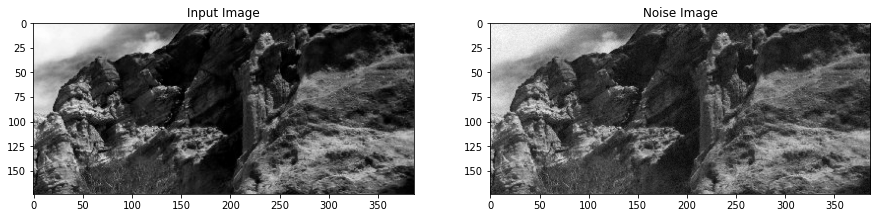

In [16]:
input_image = Image.open(awgn_image)
Awgn_image_input = np.array(input_image)
Awgn_image_input=Awgn_image_input[:,:,0]

noise = np.random.normal(0, np.sqrt(25), Awgn_image_input.shape)
noisy_img = np.uint8(np.clip(Awgn_image_input + noise, 0, 255))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(Awgn_image_input,cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(noisy_img,cmap='gray')
ax2.set_title('Noise Image')


#### 1. Average filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. What could be an appropriate window size for this noise level? 

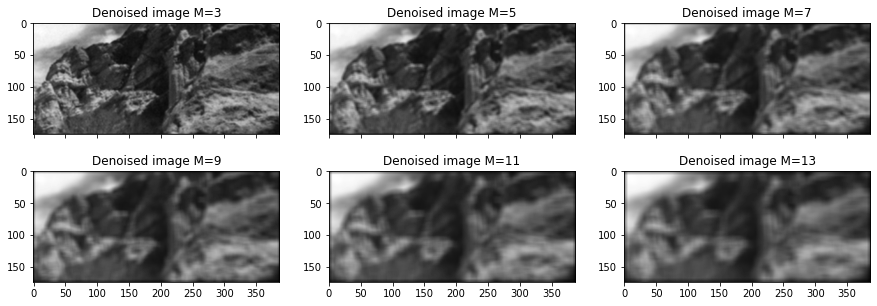

In [17]:
def Average_filter(filter_size,noisy_img):
  M = filter_size
  height, width = noisy_img.shape
  padded_img = np.zeros((height + M - 1, width + M - 1), np.float32)
  padded_img[M//2:height+M//2, M//2:width+M//2] = noisy_img.astype(np.float32)
  avg_filter = np.ones((M, M), np.float32) / (M * M)
  denoised_img = np.zeros_like(noisy_img, np.float32)
  for i in range(height):
      for j in range(width):
          denoised_img[i, j] = np.sum(avg_filter * padded_img[i:i+M, j:j+M])
  denoised_img = np.uint8(denoised_img)
  
  return denoised_img

denoised_image_3=Average_filter(3,noisy_img)
denoised_image_5=Average_filter(5,noisy_img)
denoised_image_7=Average_filter(7,noisy_img)
denoised_image_9=Average_filter(9,noisy_img)
denoised_image_11=Average_filter(11,noisy_img)
denoised_image_13=Average_filter(13,noisy_img)

fig, ax = plt.subplots(2, 3, figsize=(15, 5),sharex=True, )
ax[0,0].set_title("Denoised image M=3")
ax[0,0].imshow(denoised_image_3, cmap='gray')
ax[0,1].set_title("Denoised image M=5")
ax[0,1].imshow(denoised_image_5, cmap='gray')
ax[0,2].set_title("Denoised image M=7")
ax[0,2].imshow(denoised_image_7, cmap='gray')
ax[1,0].set_title("Denoised image M=9")
ax[1,0].imshow(denoised_image_9, cmap='gray')
ax[1,1].set_title("Denoised image M=11")
ax[1,1].imshow(denoised_image_11, cmap='gray')
ax[1,2].set_title("Denoised image M=13")
ax[1,2].imshow(denoised_image_13, cmap='gray')

#### 2. Gaussian filter of size 5 × 5. Experiment with the standard deviation h of the filter from 0.5 to 5 in steps of 0.5 and observe its effect on denoising. 

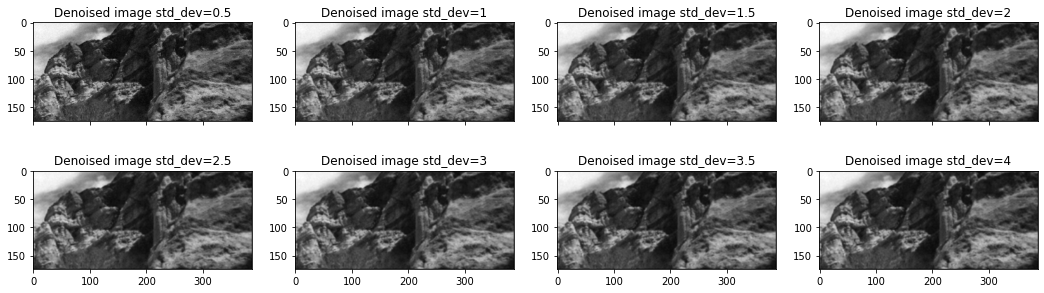

In [18]:
def Gaussian_filter(std_dev,noisy_img):

  M = 3
  sigma = std_dev
  x, y = np.meshgrid(np.linspace(-M//2, M//2, M), np.linspace(-M//2, M//2, M))
  gaussian_filter = np.exp(-(x**2 + y**2) / (2*sigma**2)) / (2*np.pi*sigma**2)
  gaussian_filter /= np.sum(gaussian_filter)
  height, width = noisy_img.shape
  padded_img = np.zeros((height + M - 1, width + M - 1), np.float32)
  padded_img[M//2:height+M//2, M//2:width+M//2] = noisy_img.astype(np.float32)
  denoised_img = np.zeros_like(noisy_img, np.float32)
  for i in range(height):
      for j in range(width):
          denoised_img[i, j] = np.sum(gaussian_filter * padded_img[i:i+M, j:j+M])

  denoised_img = np.uint8(denoised_img)

  return denoised_img

denoised_img_0_5=Gaussian_filter(0.5,noisy_img)
denoised_img_1=Gaussian_filter(1,noisy_img)
denoised_img_1_5=Gaussian_filter(1.5,noisy_img)
denoised_img_2=Gaussian_filter(2,noisy_img)
denoised_img_2_5=Gaussian_filter(2.5,noisy_img)
denoised_img_3=Gaussian_filter(3,noisy_img)
denoised_img_3_5=Gaussian_filter(3.5,noisy_img)
denoised_img_4=Gaussian_filter(4,noisy_img)

fig, ax = plt.subplots(2, 4, figsize=(18, 5),sharex=True, )
ax[0,0].set_title("Denoised image std_dev=0.5")
ax[0,0].imshow(denoised_img_0_5, cmap='gray')
ax[0,1].set_title("Denoised image std_dev=1")
ax[0,1].imshow(denoised_img_1, cmap='gray')
ax[0,2].set_title("Denoised image std_dev=1.5")
ax[0,2].imshow(denoised_img_1_5, cmap='gray')
ax[0,3].set_title("Denoised image std_dev=2")
ax[0,3].imshow(denoised_img_2, cmap='gray')

ax[1,0].set_title("Denoised image std_dev=2.5")
ax[1,0].imshow(denoised_img_2_5, cmap='gray')
ax[1,1].set_title("Denoised image std_dev=3")
ax[1,1].imshow(denoised_img_3, cmap='gray')
ax[1,2].set_title("Denoised image std_dev=3.5")
ax[1,2].imshow(denoised_img_3_5, cmap='gray')
ax[1,3].set_title("Denoised image std_dev=4")
ax[1,3].imshow(denoised_img_4, cmap='gray')

#### 3. Median filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. What could be an appropriate window size for this noise level? 

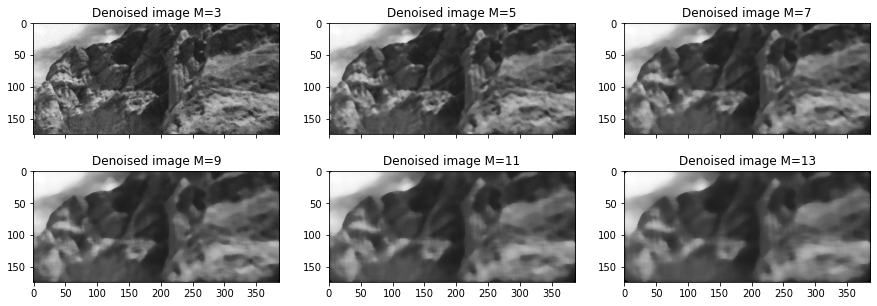

In [19]:
def Median_filter(filter_size,noisy_img):

  M = filter_size
  height, width = noisy_img.shape
  padded_img = np.zeros((height + M - 1, width + M - 1), np.uint8)
  padded_img[M//2:height+M//2, M//2:width+M//2] = noisy_img
  denoised_img = np.zeros_like(noisy_img, np.uint8)
  for i in range(height):
      for j in range(width):
          median_value = np.median(padded_img[i:i+M, j:j+M])
          denoised_img[i, j] = median_value

  return denoised_img

denoised_image_3=Median_filter(3,noisy_img)
denoised_image_5=Median_filter(5,noisy_img)
denoised_image_7=Median_filter(7,noisy_img)
denoised_image_9=Median_filter(9,noisy_img)
denoised_image_11=Median_filter(11,noisy_img)
denoised_image_13=Median_filter(13,noisy_img)

fig, ax = plt.subplots(2, 3, figsize=(15, 5),sharex=True, )
ax[0,0].set_title("Denoised image M=3")
ax[0,0].imshow(denoised_image_3, cmap='gray')
ax[0,1].set_title("Denoised image M=5")
ax[0,1].imshow(denoised_image_5, cmap='gray')
ax[0,2].set_title("Denoised image M=7")
ax[0,2].imshow(denoised_image_7, cmap='gray')
ax[1,0].set_title("Denoised image M=9")
ax[1,0].imshow(denoised_image_9, cmap='gray')
ax[1,1].set_title("Denoised image M=11")
ax[1,1].imshow(denoised_image_11, cmap='gray')
ax[1,2].set_title("Denoised image M=13")
ax[1,2].imshow(denoised_image_13, cmap='gray')



#### Edge Detection

#### 4. Use Sobel and Prewwit Operators to get the edge map from the given image.

In [20]:
def edge_map(kernel,input_image):

  pad_size = kernel.shape[0] // 2

  padded_input = np.pad(input_image, pad_size, mode='constant')

  output = np.zeros_like(input_image)
  for i in range(pad_size, padded_input.shape[0]-pad_size):
      for j in range(pad_size, padded_input.shape[1]-pad_size):
          output[i-pad_size, j-pad_size] = np.sum(kernel * padded_input[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1])
  
  return output

uint8


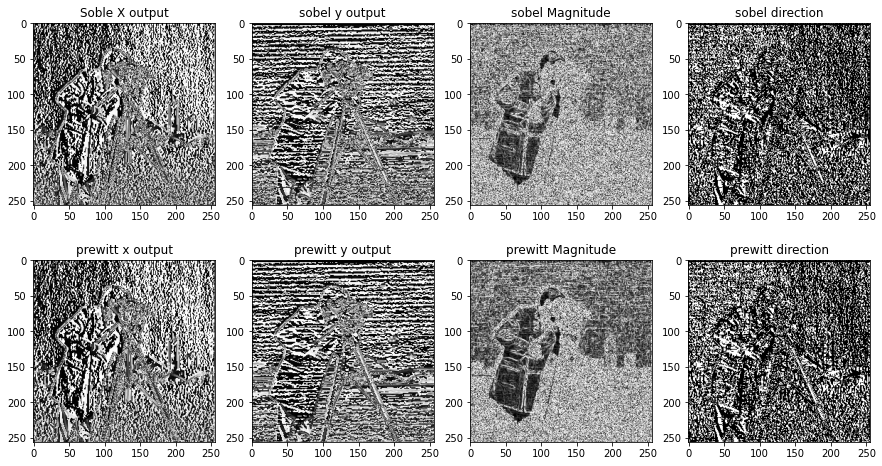

In [21]:
input_image = Image.open(Edge_detection_image)
Ed_image = np.array(input_image)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])



sobel_x_output =edge_map(sobel_x,Ed_image)
sobel_y_output = edge_map(sobel_y,Ed_image)
prewitt_x_output = edge_map(prewitt_x,Ed_image)
prewitt_y_output = edge_map(prewitt_y,Ed_image)

sobel_mag = np.sqrt(sobel_x_output ** 2 + sobel_y_output ** 2)
sobel_dir = np.arctan2(sobel_y_output, sobel_x_output)

prewitt_mag = np.sqrt(prewitt_x_output ** 2 + prewitt_y_output ** 2)
prewitt_dir = np.arctan2(prewitt_y_output, prewitt_x_output)

dtype = sobel_x_output.dtype
print(dtype)

fig, ax = plt.subplots(2,4,figsize=(15, 8))
ax[0,0].set_title("Soble X output")
ax[0,0].imshow(sobel_x_output, cmap='gray')
ax[0,1].set_title("sobel y output")
ax[0,1].imshow(sobel_y_output, cmap='gray')
ax[0,2].set_title("sobel Magnitude")
ax[0,2].imshow(sobel_mag.astype(np.uint8), cmap='gray')
ax[0,3].set_title("sobel direction")
ax[0,3].imshow(sobel_dir.astype(np.uint8), cmap='gray')

ax[1,0].set_title("prewitt x output")
ax[1,0].imshow(prewitt_x_output, cmap='gray')
ax[1,1].set_title("prewitt y output")
ax[1,1].imshow(prewitt_y_output, cmap='gray')
ax[1,2].set_title("prewitt Magnitude")
ax[1,2].imshow(prewitt_mag.astype(np.uint8), cmap='gray')
ax[1,3].set_title("prewitt direction")
ax[1,3].imshow(prewitt_dir.astype(np.uint8), cmap='gray')


#### 5. Estimate gradient magnitude using the following definitions: (6)
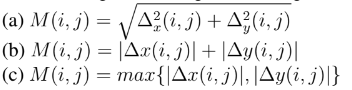

#### a.

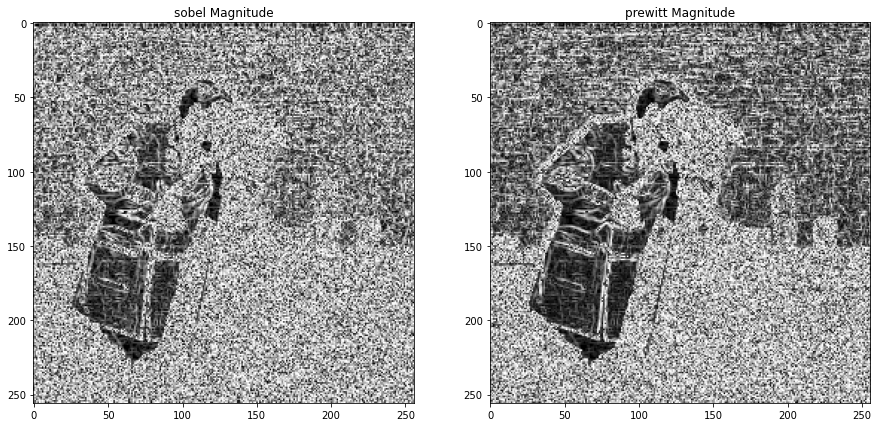

In [22]:
sobel_mag = np.sqrt(sobel_x_output ** 2 + sobel_y_output ** 2)
prewitt_mag = np.sqrt(prewitt_x_output ** 2 + prewitt_y_output ** 2)

fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].set_title("sobel Magnitude")
ax[0].imshow(sobel_mag.astype(np.uint8), cmap='gray')
ax[1].set_title("prewitt Magnitude")
ax[1].imshow(prewitt_mag.astype(np.uint8), cmap='gray')

#### b.

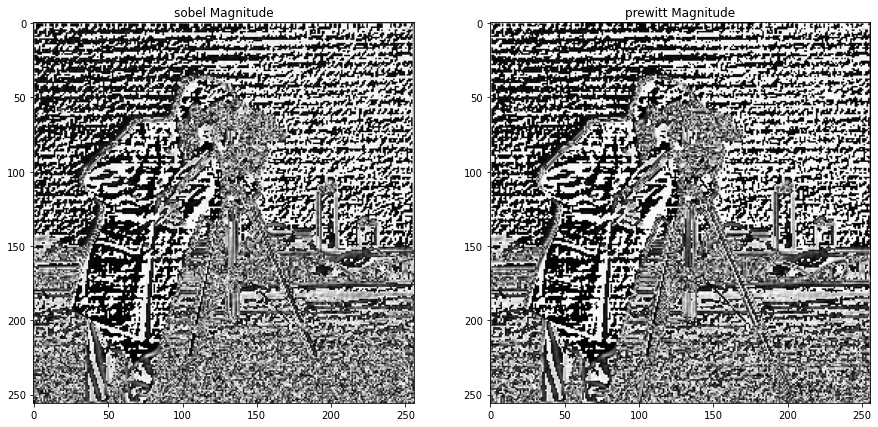

In [23]:
sobel_mag = sobel_x_output + sobel_y_output
prewitt_mag = prewitt_x_output + prewitt_y_output 

fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].set_title("sobel Magnitude")
ax[0].imshow(sobel_mag.astype(np.uint8), cmap='gray')
ax[1].set_title("prewitt Magnitude")
ax[1].imshow(prewitt_mag.astype(np.uint8), cmap='gray')

#### c. 

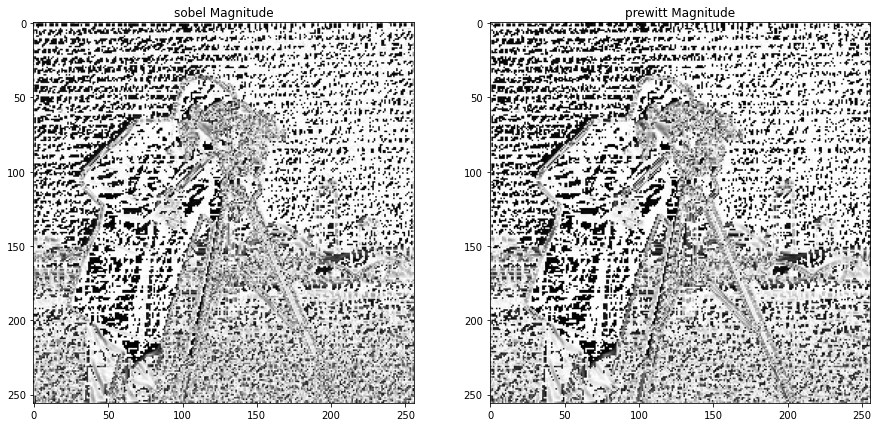

In [24]:
sobel_mag = np.maximum(sobel_x_output , sobel_y_output)
prewitt_mag = np.maximum(prewitt_x_output , prewitt_y_output) 

fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].set_title("sobel Magnitude")
ax[0].imshow(sobel_mag.astype(np.uint8), cmap='gray')
ax[1].set_title("prewitt Magnitude")
ax[1].imshow(prewitt_mag.astype(np.uint8), cmap='gray')

#### 6. Laplacian Edge Detectors: Compute the Laplacian using the convolution template 

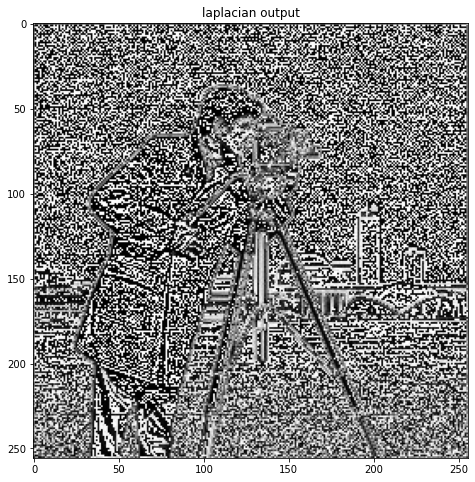

In [25]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_output =edge_map(laplacian_kernel,Ed_image)

fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.set_title("laplacian output")
ax.imshow(laplacian_output, cmap='gray')

#### 7. Compute the edge map E as the output of a zero crossing detector.

In [26]:
def morphological_closing(img, kernel):
    dilation=edge_map(kernel,img)
    erosion =edge_map(kernel,dilation)

    return erosion

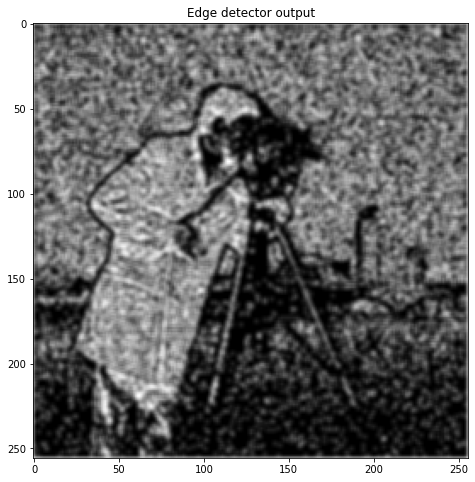

In [27]:
thresh = 10
binary = np.zeros_like(laplacian_output)
binary[laplacian_output > thresh] = 255
kernel = np.ones((3, 3), np.uint8)
edge=morphological_closing(binary, kernel)
fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.set_title("Edge detector output")
ax.imshow(edge, cmap='gray')

#### 8. Laplacian of Gaussian (LoG):- LoG was motivated by the sensitivity of gradient and Laplacian edge detectors to noise. In this problem, you will implement an edge detector using the LoG operator. Work with the lighthouse.png image that is corrupted with AWGN whose σ^n = 10. Experiment with different values of σ for the Gaussian pre-filter and compute the edgemap E after zero crossing detection. Compare your result with gradient based techniques implemented above and verify the robustness of LoG.

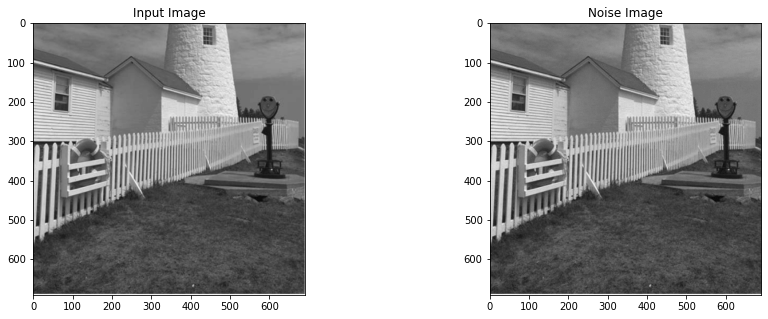

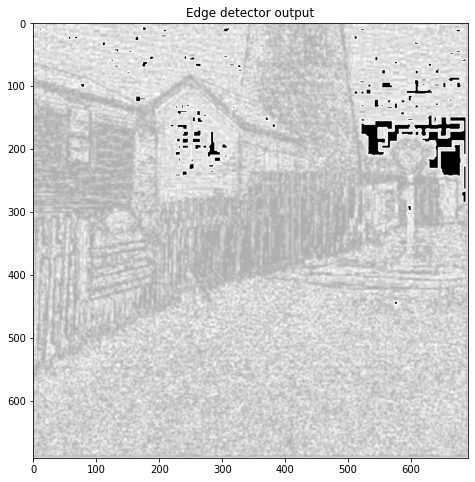

In [28]:
input_image = Image.open(log_image)
Awgn_image_input = np.array(input_image)
Awgn_image_input=Awgn_image_input[:,:,0]

noise = np.random.normal(0, np.sqrt(10), Awgn_image_input.shape)
noisy_img = np.uint8(np.clip(Awgn_image_input + noise, 0, 255))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(Awgn_image_input,cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(noisy_img,cmap='gray')
ax2.set_title('Noise Image')


laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_output =edge_map(laplacian_kernel,Awgn_image_input)

thresh = 10
binary = np.zeros_like(laplacian_output)
binary[laplacian_output > thresh] = 255
kernel = np.ones((3, 3), np.uint8)
edge=morphological_closing(binary, kernel)
fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.set_title("Edge detector output")
ax.imshow(edge, cmap='gray')

# Problem 3: 2D-DFT

#### 2D-DFT:- Recall the definition of the 2D-DFT from class. Assume that you are working with square images. Write a program, that implements the DFT/IDFT pair using the following techniques.

#### 1. From first principles i.e., as a summation over two dimensions. Now do the following using three of your favorite images from the above set:




In [29]:

def DFT2D(image):
    M, N = image.shape
    dft = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            sum = 0
            for x in range(M):
                for y in range(N):
                    sum += image[x, y] * np.exp(-2j * np.pi * ((u * x) / M + (v * y) / N))
            dft[u, v] = sum
    return dft


In [30]:
def IDFT2D(dft):
    M, N = dft.shape
    image = np.zeros((M, N), dtype=np.complex128)
    for x in range(M):
        for y in range(N):
            sum = 0
            for u in range(M):
                for v in range(N):
                    sum += dft[u, v] * np.exp(2j * np.pi * ((u * x) / M + (v * y) / N))
            image[x, y] = sum / (M * N)
    return np.real(image)

<ipython-input-31-67143d77fb72>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')


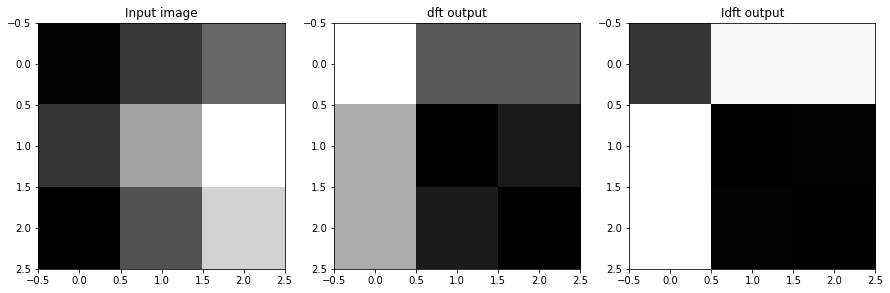

In [31]:
#image=Image.open(dft_image_1)

image=np.array([[12,34,54],[33,80,120],[10,45,100]])
dft_output=DFT2D(image)
Idft_output=IDFT2D(image)


fig, ax = plt.subplots(1,3,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')
ax[2].set_title("Idft output")
ax[2].imshow(Idft_output.astype(np.uint8), cmap='gray')




<ipython-input-32-3cd1bdee8721>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')


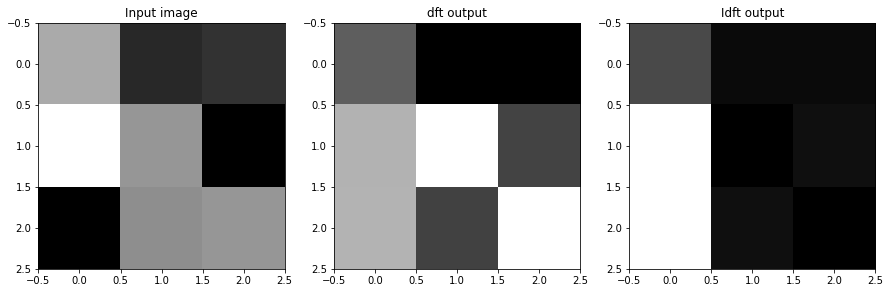

In [32]:
#image=Image.open(dft_image_1)

image=np.array([[112,34,40],[163,100,10],[10,95,100]])
dft_output=DFT2D(image)
Idft_output=IDFT2D(image)


fig, ax = plt.subplots(1,3,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')
ax[2].set_title("Idft output")
ax[2].imshow(Idft_output.astype(np.uint8), cmap='gray')




<ipython-input-33-04809625478a>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')


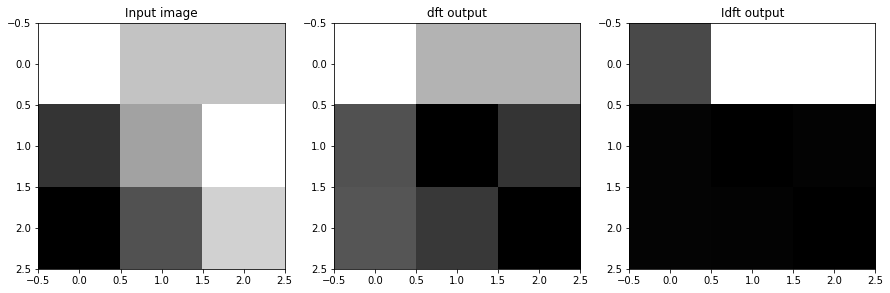

In [33]:
#image=Image.open(dft_image_1)

image=np.array([[120,94,94],[33,80,120],[10,45,100]])
dft_output=DFT2D(image)
Idft_output=IDFT2D(image)


fig, ax = plt.subplots(1,3,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')
ax[2].set_title("Idft output")
ax[2].imshow(Idft_output.astype(np.uint8), cmap='gray')




#### 2. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

In [34]:
def DFT_2D(image):
  M, N = image.shape
  
  dft_real = np.zeros((M,N))
  dft_imag = np.zeros((M,N))

  for u in range(M):
      for v in range(N):
          for x in range(M):
              for y in range(N):
                  dft_real[u,v] += image[x,y] * np.cos(2 * np.pi * ((u * x / M) + (v * y /N)))
                  dft_imag[u,v] -= image[x,y] * np.sin(2 * np.pi * ((u * x / M) + (v * y /N)))
          
  
  magnitude = np.zeros((M,N))
  phase = np.zeros((M,N))
  for u in range(M):
      for v in range(N):
          magnitude[u,v] = np.sqrt(dft_real[u,v]**2 + dft_imag[u,v]**2)
          phase[u,v] = np.arctan2(dft_imag[u,v], dft_real[u,v])

  log_magnitude = np.log(1 + magnitude)

  yield magnitude.astype(np.uint8)
  yield phase.astype(np.uint8)
  yield log_magnitude.astype(np.uint8)

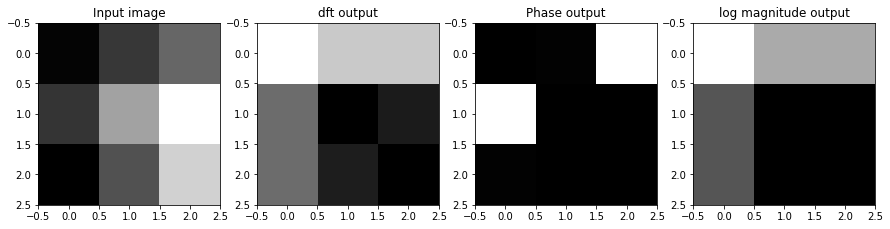

In [35]:
#image=Image.open(dft_image_1)

image=np.array([[12,34,54],[33,80,120],[10,45,100]])
dft_output=DFT_2D(image)

fig, ax = plt.subplots(1,4,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(next(dft_output), cmap='gray')
ax[2].set_title("Phase output")
ax[2].imshow(next(dft_output), cmap='gray')
ax[3].set_title("log magnitude output")
ax[3].imshow(next(dft_output), cmap='gray')



#### 3. Verify that IDFT[DFT[I]] = I. 

<ipython-input-36-53778c286aeb>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')


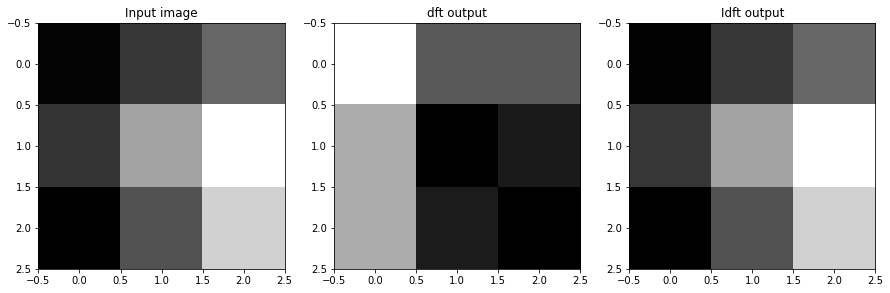

In [36]:
image=np.array([[12,34,54],[33,80,120],[10,45,100]])
dft_output=DFT2D(image)
Idft_output=IDFT2D(dft_output)


fig, ax = plt.subplots(1,3,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')
ax[2].set_title("Idft output")
ax[2].imshow(Idft_output.astype(np.uint8), cmap='gray')

#### 4. Show the importance of phase by transposing the phase matrix and then synthesizing the image. 
#### Repeat by 



#### a) setting the phase to 0

In [37]:
def DFT_2D(image):
  M, N = image.shape
  
  dft_real = np.zeros((M,N))
  #dft_imag = np.zeros((M,N))

  for u in range(M):
      for v in range(N):
          for x in range(M):
              for y in range(N):
                  dft_real[u,v] += image[x,y] * np.cos(2 * np.pi * ((u * x / M) + (v * y /N)))
                  #dft_imag[u,v] -= image[x,y] * np.sin(2 * np.pi * ((u * x / M) + (v * y /N)))
          
  return dft_real

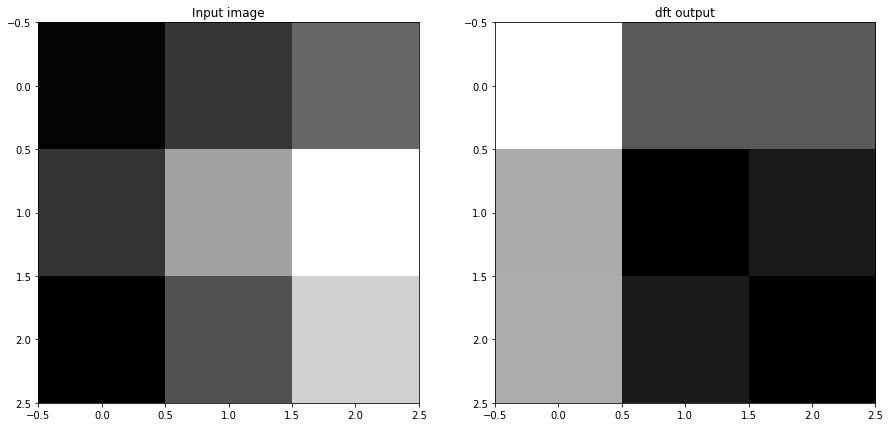

In [38]:
image=np.array([[12,34,54],[33,80,120],[10,45,100]])
dft_output=DFT_2D(image)

fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')

#### b) by adding noise. 

Text(0.5, 1.0, 'Noise Image')

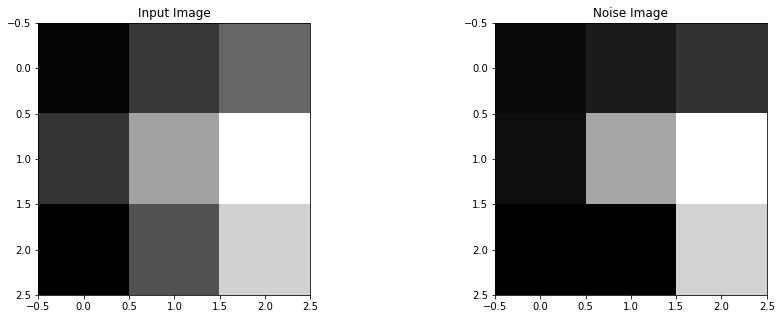

In [39]:
Awgn_image_input = np.array(image)
#Awgn_image_input=Awgn_image_input[:,:,0]

noise = np.random.normal(0, np.sqrt(100), Awgn_image_input.shape)
noisy_img = np.uint8(np.clip(Awgn_image_input + noise, 0, 255))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(Awgn_image_input,cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(noisy_img,cmap='gray')
ax2.set_title('Noise Image')

In [40]:
def DFT_2D(image):
  M, N = image.shape
  
  dft_real = np.zeros((M,N))
  dft_imag = np.zeros((M,N))

  for u in range(M):
      for v in range(N):
          for x in range(M):
              for y in range(N):
                  dft_real[u,v] += image[x,y] * np.cos(2 * np.pi * ((u * x / M) + (v * y /N)))
                  dft_imag[u,v] -= image[x,y] * np.sin(2 * np.pi * ((u * x / M) + (v * y /N)))
          
  
  magnitude = np.zeros((M,N))
  phase = np.zeros((M,N))
  for u in range(M):
      for v in range(N):
          magnitude[u,v] = dft_real[u,v]**2  
          phase[u,v] = dft_imag[u,v]**2
  
  return  np.sqrt(magnitude + phase.T)

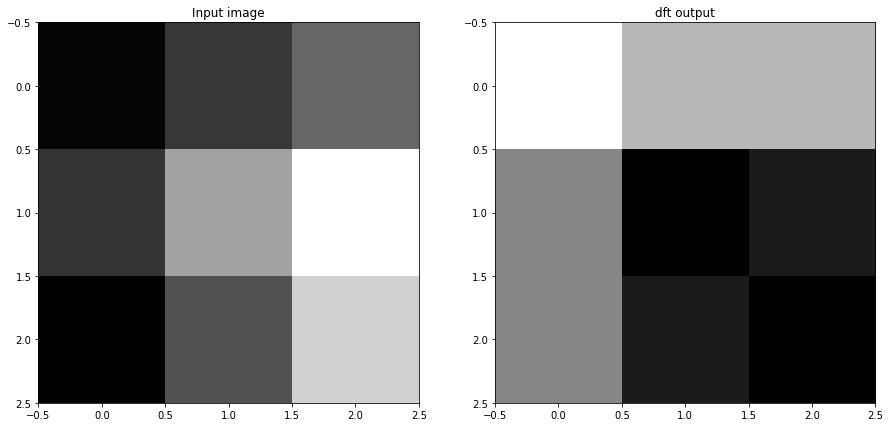

In [41]:
image=np.array([[12,34,54],[33,80,120],[10,45,100]])
dft_output=DFT_2D(image)

fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].set_title("Input image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("dft output")
ax[1].imshow(dft_output.astype(np.uint8), cmap='gray')